In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
np.set_printoptions(precision=4)

In [3]:
df = pd.read_csv('./dataset/logistic_regression/Heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


### Data preperation

Drop unnecessary features

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [5]:
df['ChestPain'] = df['ChestPain'].astype('category').cat.codes
df['Thal'] = df['Thal'].astype('category').cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,Yes
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,Yes
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,Yes
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,Yes


### Check for nulls

In [6]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

### Get ready for train and test datasets

In [8]:
X = df.drop(columns=['AHD'])
y = df['AHD']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=123)

### Scale

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print('X_train_scaled', X_train_scaled)
print('X_test_scaled', X_test_scaled)

X_train_scaled [[-0.4916 -1.3346 -0.7795 ... -0.9637 -0.7152 -0.4118]
 [ 1.0252 -1.3346 -0.7795 ...  0.4658  2.2685  1.1816]
 [ 1.3753 -1.3346 -0.7795 ...  0.4658  1.2739  1.1816]
 ...
 [-0.0249  0.7493 -0.7795 ... -0.9637 -0.7152 -0.4118]
 [-0.6083  0.7493  0.4166 ... -0.9637  2.2685 -0.4118]
 [-0.2583  0.7493  1.6128 ... -0.9637  0.2794 -0.4118]]
X_test_scaled [[-1.2702  0.6695 -0.9199 ... -0.9938 -0.7216  1.1034]
 [ 0.7993 -1.4936  0.081  ...  0.7454  0.3845  1.1034]
 [-0.7256  0.6695  0.081  ... -0.9938  1.4907 -0.5517]
 ...
 [ 1.235  -1.4936  2.0828 ...  2.4845 -0.7216 -0.5517]
 [ 1.0171  0.6695 -0.9199 ...  0.7454  0.3845  1.1034]
 [ 0.4725  0.6695  1.0819 ... -0.9938 -0.7216 -0.5517]]


In [11]:
y_train = y_train.astype('category').cat.codes
y_test = y_test.astype('category').cat.codes

print('y_train\n:', y_train, end='\n\n')
print('y_test\n:', y_test)

y_train
: 200    0
121    1
213    1
256    0
87     0
      ..
106    1
83     1
17     0
232    1
98     0
Length: 89, dtype: int8

y_test
: 204    0
114    1
164    0
279    0
295    0
      ..
145    1
38     1
27     0
252    0
140    0
Length: 210, dtype: int8


### Logisic Regression (sklearn)

In [12]:
from sklearn.linear_model import LogisticRegression

sklearn_model = LogisticRegression(random_state=0)

sklearn_model.fit(X_train_scaled, y_train)
print('w_j:', sklearn_model.coef_)
print('b:', sklearn_model.intercept_)
print('R^2:', sklearn_model.score(X_test_scaled, y_test))

y_hat = sklearn_model.predict(X_test_scaled)
y_hat

w_j: [[-0.0441  0.5132 -0.6566 -0.1722  0.1667 -0.8435  0.6329 -0.4216  1.52
  -0.1581  0.6467  1.2541  0.7186]]
b: [0.375]
R^2: 0.7619047619047619


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [13]:
def sigmoid(w: np.ndarray, x_i: np.ndarray, b):
    return 1 / (1 + np.exp(-(np.dot(w, x_i) + b)))

In [14]:
def logistic_loss(y_hat: float, y_i: float):
    '''
    # Logistic's Loss Function
    f(x) = 1 / 1 + e^(-z)
    L(f(x), y^(i)) = -y^(i) * log(f(x)) - (1 - y^(i))log(1 - f(x))
    '''
    return -y_i * np.log(y_hat) - (1 - y_i) * np.log(1 - y_hat)

In [15]:
def logistic_cost(x: np.ndarray, y: np.ndarray, w: np.ndarray, b: float):
    '''
    # Cost Function
    J(w, b) = 1/m * sum(L(f, y^(i)))
    '''
    sum = 0
    m = x.shape[0]
    for i in range(m - 1):
        f = sigmoid(w, x[i], b)
        sum += logistic_loss(f, y[i])

    return sum / m

### Define the derivaties: dj/dw and dj/db

In [16]:
import copy

def logistic_derivatives(x: np.ndarray, y: np.ndarray, w: np.ndarray, b: float):
    
    m, n = x.shape

    dj_dw = copy.deepcopy(w)
    dj_db = 0

    for i in range(m - 1):
        f = sigmoid(w, x[i], b) 
        for j in range(n):
            dj_dw[j] += (f - y[i]) * x[i][j]
        
        dj_db += (f - y[i])
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return (dj_dw, dj_db)
    

### Gradient Descent

In [17]:
def gradient_descent(X_train: np.ndarray, y_train: np.ndarray):

   m, n = X_train.shape

   # Parameters
   w = np.zeros(n)
   b = 0.0
   a = 0.1
   cost_hist = np.zeros(0)

   for i in range(1500):
      
      dj_dw, dj_db = logistic_derivatives(X_train, y_train, w, b)
      
      w -= a * dj_dw
      b -= a * dj_db

      if((i % 100) == 0):
         j = logistic_cost(X_train, y_train, w, b)
         cost_hist = np.append(cost_hist, j)
         print("Iteration", i, "|","Cost:", j)
         
   return (w, b, a, cost_hist)

### Run Gradient Descent

In [18]:
# Convert Dataframe into numpy
y_train = y_train.astype('category').cat.codes.to_numpy()
y_train

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0], dtype=int8)

In [19]:
w, b, a, cost_hist = gradient_descent(X_train_scaled, y_train)

Iteration 0 | Cost: 0.6446003507006894
Iteration 100 | Cost: 0.27239080496332585
Iteration 200 | Cost: 0.24761522009526032


Iteration 300 | Cost: 0.23684403277668126
Iteration 400 | Cost: 0.23071050951883745
Iteration 500 | Cost: 0.22680324106351243
Iteration 600 | Cost: 0.2241539705439636
Iteration 700 | Cost: 0.22228621479799568
Iteration 800 | Cost: 0.22093464411231653
Iteration 900 | Cost: 0.21993853267268515
Iteration 1000 | Cost: 0.21919452892819255
Iteration 1100 | Cost: 0.21863322625446532
Iteration 1200 | Cost: 0.21820648483471028
Iteration 1300 | Cost: 0.2178800864815253
Iteration 1400 | Cost: 0.21762924266223538


In [20]:
print('w_j:', w)
print('b:', b)

w_j: [-0.0429  0.5127 -0.6409 -0.1577  0.1492 -0.8332  0.6154 -0.4232  1.4995
 -0.1361  0.6184  1.2527  0.7009]
b: 0.37709751134162445


In [21]:
def predict(x_test: np.ndarray, w: np.ndarray, b: float):

    predictions = []

    for data in x_test:
        logistic = 1 / (1 + np.exp(np.dot(w, data) + b))
        predictions.append(int(logistic <= 0.5 ))

    return np.array(predictions, dtype=np.int8)

In [22]:
own_prediction = predict(X_test_scaled, w, b)
own_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

### Metrics

In [23]:
from sklearn.metrics import mean_absolute_error

sklearn_model_metric = mean_absolute_error(y_test, y_hat)
own_model_metric = mean_absolute_error(y_test, own_prediction)
print('sklearn_model_metric:', sklearn_model_metric)
print('own_model_metric:', own_model_metric)

sklearn_model_metric: 0.23809523809523808
own_model_metric: 0.22857142857142856


### Logistic Cost J curve

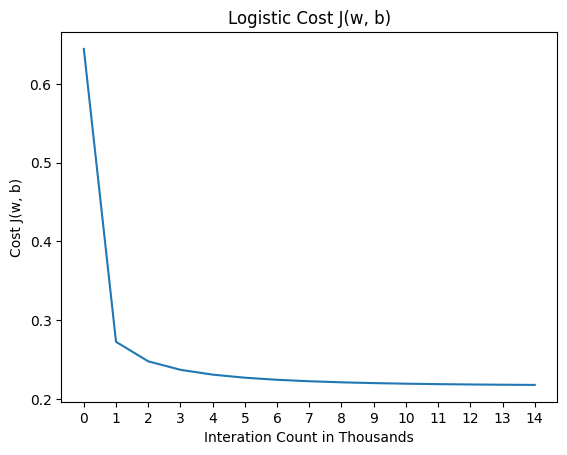

In [24]:
plt.plot(cost_hist)
plt.title("Logistic Cost J(w, b)")
plt.xlabel("Interation Count in Thousands")
plt.ylabel("Cost J(w, b)")
plt.xticks(np.arange(0, cost_hist.size))
plt.show()